# probando voila
#### Este repositorio tiene los materiales para visualizar unos mapas y crear una aplicacion web con voila y mybinder.

<details>
    <summary><strong>Meta</strong></summary>
    "La meta de este notebook es recrear la figura X del reporte XYZ ..."
    <ul>
        <li> Metas mensurables </li>
        <li> Ej 1: Identificar <i>variables de interes en el conjunto de datos <strong>nombre_chido_de_conjunto_de_datos.csv</strong></i> </li>
        <li> Ej 2: Crear un <i>dataset trabajable</i> de los datos en bruto.</li>
    </ul>
</details>

<details>
    <summary><strong>Contexto</strong></summary>
    Contexto en este momento (por ejemplo, "hemos descargado datos sin procesar de <strong><i>website.com</i> </strong> y ahora estamos en el proceso de crear un masterfile").
    <li> ¿Cuál es el objetivo final de este proyecto? </li>
    <li> ¿Qué estamos tratando de recrear? ¿Dónde estamos en el proceso? </li>
    <li> Cualquier enlace a documentación / figuras. </li>
</details>

In [1]:
import pandas as pd
import geopandas as gpd
from zipfile import ZipFile
from pathlib import Path
from herramientas import arbol
from datetime import datetime as dt
%matplotlib inline

hoy = dt.today().strftime("%d-%b-%y")

hoy

'24-Jun-19'

In [2]:
DATOS_BRUTOS = Path("../datos/brutos/")
DATOS_INTERINOS = Path("../datos/interinos/")
DATOS_PROCESADOS = Path("../datos/procesados/")
DATOS_EXTERNOS = Path("../datos/externos/")

In [3]:
arbol(DATOS_BRUTOS)

+ ..\datos\brutos
    + Base de datos de pobreza AGEB segun entidad federativa 2015.zip


## Datos pobreza

In [4]:
ZipFile(DATOS_BRUTOS / 'Base de datos de pobreza AGEB segun entidad federativa 2015.zip').extractall(DATOS_INTERINOS / 'datos_pobreza')

In [5]:
arbol(DATOS_INTERINOS / 'datos_pobreza')

+ ..\datos\interinos\datos_pobreza
    + Base de datos de pobreza AGEB segun entidad federativa 2015.xlsx


In [6]:
archivo_excel = pd.ExcelFile(DATOS_INTERINOS / 'datos_pobreza' / 'Base de datos de pobreza AGEB segun entidad federativa 2015.xlsx')

In [7]:
archivo_excel.sheet_names

['Índice',
 'Aguascalientes',
 'Baja California  ',
 'Baja California Sur ',
 'Campeche',
 'Coahuila',
 'Colima',
 'Chiapas',
 'Chihuahua',
 'Ciudad de México',
 'Durango',
 'Guanajuato',
 'Guerrero',
 'Hidalgo',
 'Jalisco',
 'México',
 'Michoacán',
 'Morelos',
 'Nayarit',
 'Nuevo León',
 'Oaxaca',
 'Puebla',
 'Querétaro',
 'Quintana Roo',
 'San Luis Potosí',
 'Sinaloa',
 'Sonora',
 'Tabasco',
 'Tamaulipas',
 'Tlaxcala',
 'Veracruz',
 'Yucatán',
 'Zacatecas']

Nota: Cada pestaña tiene la tabla de un estado. Los encabezados estan en la línea 5 pero los datos no comienzan hasta la línea 8.

In [13]:
estado = archivo_excel.parse('Baja California  ', header = 4, converters = {"Clave de municipio": str}, usecols = ['Clave de \nAGEB', 'Entidad \nfederativa', 'Rango de pobreza (%)', 'Rango de pobreza extrema (%)'])
estado.dropna(axis = 1, how = 'all', inplace = True)
estado.dropna(how = 'any', inplace = True)

estado.columns = ['Entidad Federativa', 'CVEGEO',  'Rango de pobreza (%)', 'Rango de pobreza extrema (%)']

estado.head()

,Entidad Federativa,CVEGEO,Rango de pobreza (%),Rango de pobreza extrema (%)
2,Baja California,0200100010435,"(34, 50]","[ 0, 20]"
3,Baja California,020010001044A,"(18, 34]","[ 0, 20]"
4,Baja California,0200100010454,"[ 0, 18]","[ 0, 20]"
5,Baja California,0200100010488,"(34, 50]","[ 0, 20]"
6,Baja California,0200100010492,Sin viviendas particulares habitadas,Sin viviendas particulares habitadas


In [14]:
estado.reset_index(inplace = True, drop = True)

In [15]:
estado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1656 entries, 0 to 1655
Data columns (total 4 columns):
Entidad Federativa              1656 non-null object
CVEGEO                          1656 non-null object
Rango de pobreza (%)            1656 non-null object
Rango de pobreza extrema (%)    1656 non-null object
dtypes: object(4)
memory usage: 51.8+ KB


In [16]:
estado.head()

,Entidad Federativa,CVEGEO,Rango de pobreza (%),Rango de pobreza extrema (%)
0,Baja California,0200100010435,"(34, 50]","[ 0, 20]"
1,Baja California,020010001044A,"(18, 34]","[ 0, 20]"
2,Baja California,0200100010454,"[ 0, 18]","[ 0, 20]"
3,Baja California,0200100010488,"(34, 50]","[ 0, 20]"
4,Baja California,0200100010492,Sin viviendas particulares habitadas,Sin viviendas particulares habitadas


# Datos geográficos

In [17]:
ZipFile(DATOS_PROCESADOS / 'AGEBS_limpios.zip').extractall(DATOS_PROCESADOS / 'AGEBS_limpios/')
geodatos = gpd.read_file(DATOS_PROCESADOS / 'AGEBS_limpios' / 'AGEBS_limpio.shp')

In [18]:
geodatos.head()

,CVEGEO,geometry
0,010010001216A,"POLYGON ((2472175.610600002 1095222.905299997,..."
1,0100100012649,"POLYGON ((2474436.9925 1094330.964100001, 2474..."
2,010010001383A,"POLYGON ((2472973.671700002 1091954.736200001,..."
3,010010001287A,"POLYGON ((2468473.209200002 1093564.705600001,..."
4,010010001084A,"POLYGON ((2469318.936499998 1094912.738899997,..."


In [19]:
geodatos.set_index('CVEGEO', inplace = True)
estado.set_index('CVEGEO', inplace = True)

In [20]:
datos_plot = geodatos.join(estado, on = 'CVEGEO', how = 'right')

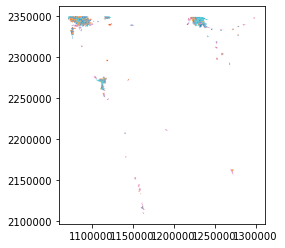

In [21]:
datos_plot.plot(column = 'Rango de pobreza (%)');

In [25]:
BC = archivo_excel.parse('Baja California  ', header = 4, converters = {"Clave de municipio": str}, usecols = ['Clave de \nAGEB', 'Municipio', 'Entidad \nfederativa', 'Rango de pobreza (%)', 'Rango de pobreza extrema (%)'])
BC.dropna(axis = 1, how = 'all', inplace = True)
BC.dropna(how = 'any', inplace = True)

BC.columns = ['Entidad Federativa', 'Municipio', 'CVEGEO',  'Rango de pobreza (%)', 'Rango de pobreza extrema (%)']

BC.head()

,Entidad Federativa,Municipio,CVEGEO,Rango de pobreza (%),Rango de pobreza extrema (%)
2,Baja California,Ensenada,0200100010435,"(34, 50]","[ 0, 20]"
3,Baja California,Ensenada,020010001044A,"(18, 34]","[ 0, 20]"
4,Baja California,Ensenada,0200100010454,"[ 0, 18]","[ 0, 20]"
5,Baja California,Ensenada,0200100010488,"(34, 50]","[ 0, 20]"
6,Baja California,Ensenada,0200100010492,Sin viviendas particulares habitadas,Sin viviendas particulares habitadas


In [26]:
tijuana = BC[BC['Municipio'] == 'Tijuana']

In [27]:
tijuana.set_index('CVEGEO', inplace = True)

In [28]:
tijuana_plot = geodatos.join(tijuana, how = 'right')

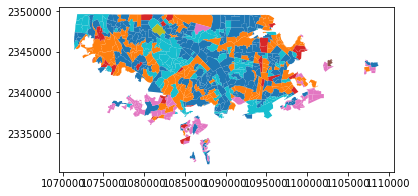

In [30]:
tijuana_plot.plot(column = 'Rango de pobreza (%)');